In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("emails.csv")
data.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [ ]:
data.describe()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [4]:
ham = data[data['spam']==0]
ham.head(5)

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0


In [5]:
spam = data[data['spam']==1]
spam.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
print("Spam % = ", (len(spam)/len(data))*100)

Spam % =  23.88268156424581


In [7]:
print("Ham % = ", (len(ham)/len(data))*100)

Ham % =  76.11731843575419


<Axes: ylabel='count'>

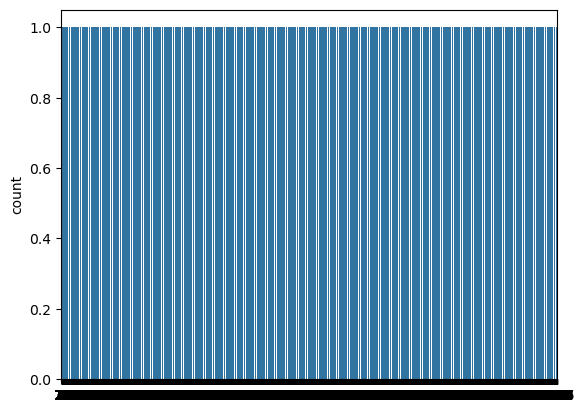

In [8]:
sns.countplot(data['spam'])

In [9]:
# feature extraction 
# technique => count vectorize

from sklearn.feature_extraction.text import CountVectorizer

sample_emails = ["This is free stuff", "Get free money", "Money is everything", "Hello how are you"]

vectorizer = CountVectorizer()
s = vectorizer.fit_transform(sample_emails)

In [12]:
print(s.toarray())

[[0 0 1 0 0 0 1 0 1 1 0]
 [0 0 1 1 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 1 1 0 0 0]
 [1 0 0 0 1 1 0 0 0 0 1]]


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
s = vectorizer.fit_transform(data['text'])

In [15]:
print(s.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
s.shape

(5728, 37303)

In [17]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
label = data['spam'].values

classifier.fit(s, label)

MultinomialNB()

In [18]:
# prepare test data 
test_emails = ["This is free stuff", "Get free money", "Money is everything", "Hello how are you"]
test_vectorize_data = vectorizer.transform(test_emails)

In [19]:
test_op = classifier.predict(test_vectorize_data)

In [20]:
test_op

array([0, 1, 1, 0], dtype=int64)

In [ ]:
# Task 1
# 1. Split the training data into train and test
# 2. Train th emodel and predict the o/p
# 3. Confusion matrix (original response vs predicted ). interpret the result (whar you understood by CM)
# 4. Tell the accuracy of model
# 5. draw the heat map for original response vs predicted (seaborn)


# Task 2 :

# https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
# clean the data set using EDA methods (nulls, missing values, outlier)
# train this model using NB/Logistic regression
# compare the accuracy and o/p